In [59]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def display(img):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.show()

def display_gray(img):
    plt.imshow(img, cmap='gray')
    plt.show()


(448, 800, 3)


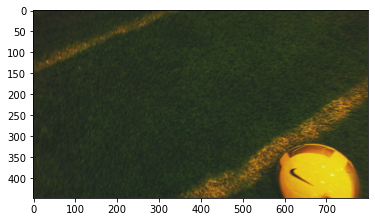

In [176]:
img = cv2.imread("images/log2/151-rgb.png")
print(img.shape)
display(img)

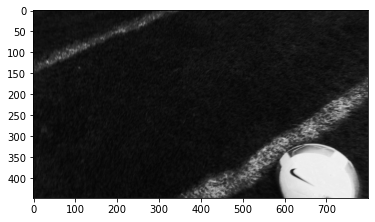

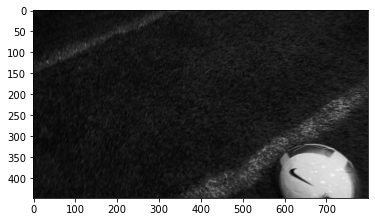

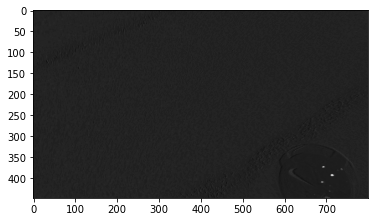

In [177]:
R = img[:,:,2]
G = img[:,:,1]
B = img[:,:,0]

display_gray(R)
display_gray(G)
display_gray(B)

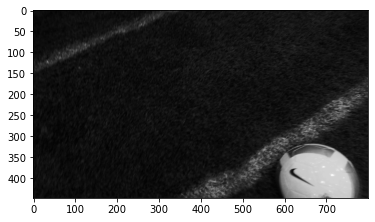

In [178]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
display_gray(gray)

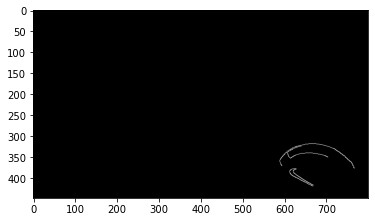

In [192]:
edges = cv2.Canny(gray,100,500)
display_gray(edges)

In [193]:

circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, 2.5, 200)
print(circles)

[[[671.25 403.75  85.75]]]


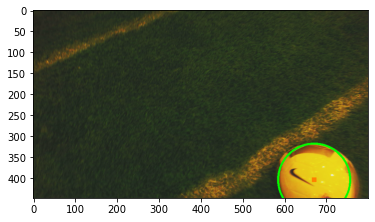

In [194]:
output = img.copy()
if circles is not None:
	# convert the (x, y) coordinates and radius of the circles to integers
    circles = np.round(circles[0, :]).astype("int")
	# loop over the (x, y) coordinates and radius of the circles
    for (x, y, r) in circles:
		# draw the circle in the output image, then draw a rectangle
		# corresponding to the center of the circle
        cv2.circle(output, (x, y), r, (0, 255, 0), 4)
        cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
        break
	# show the output image
    display(output)